# NASDAQ 100 Stocks Movement Predictor - Exploratory Data Analysis (EDA) 2 

**Author:** Renish Kanjiyani <br>
**Notebook:** EDA - 2 <br>
**Date:** 05/11/2023 <br>
**E-mail:** kanjiyanirenish2@gmail.com

Based on our previous...

In [2]:
# Import all the necessary packages we need 

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')

In [3]:
# Load our original dataset 

df = pd.read_csv('../nasdaq_stocks_100.csv', sep='\t')

In [4]:
# Viewing the first 5 rows in our dataset 

df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,AAPL
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,AAPL
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,AAPL
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,AAPL
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,AAPL


In [5]:
# Viewing the shape of our dataframe

df.shape

(271680, 8)

In [6]:
# Printing the rows and columns 

print(f"Our dataframe has {df.shape[0]} rows and {df.shape[1]} columns.")

Our dataframe has 271680 rows and 8 columns.


Continuing from the Modeling - 1 Notebook, we will now filter the features we require. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271680 entries, 0 to 271679
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       271680 non-null  object 
 1   Open       271680 non-null  float64
 2   High       271680 non-null  float64
 3   Low        271680 non-null  float64
 4   Close      271680 non-null  float64
 5   Adj Close  271680 non-null  float64
 6   Volume     271680 non-null  int64  
 7   Name       271680 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 16.6+ MB


In [8]:
# Let's drop the columns that we do not need 

df = df.drop(['Date', 'Name'], axis=1)

In [9]:
# Sanity Check 

df.head(5)

,Open,High,Low,Close,Adj Close,Volume
0,7.622500,7.660714,7.585000,7.643214,6.562591,493729600
1,7.664286,7.699643,7.616071,7.656429,6.573935,601904800
2,7.656429,7.686786,7.526786,7.534643,6.469369,552160000
3,7.562500,7.571429,7.466071,7.520714,6.457407,477131200
4,7.510714,7.571429,7.466429,7.570714,6.500339,447610800


In [10]:
# Let's create our columns 

df['Adj Closing Yday'] = df['Adj Close'].shift(1)

In [11]:
# Sanity Check 

df.head(5)

,Open,High,Low,Close,Adj Close,Volume,Adj Closing Yday
0,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,NaN
1,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,6.562591
2,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,6.573935
3,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,6.469369
4,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,6.457407


In [12]:
# Let's check for any NaN values

df.isna().sum()

Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
Adj Closing Yday    1
dtype: int64

In [13]:
# Dropping the NaN row

df = df.dropna()

In [14]:
# Sanity Check 

df.head(5)

,Open,High,Low,Close,Adj Close,Volume,Adj Closing Yday
1,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,6.562591
2,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,6.573935
3,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,6.469369
4,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,6.457407
5,7.600000,7.607143,7.444643,7.503929,6.442997,462229600,6.500339


In [15]:
# Checking the new shape of our dataframe 

df.shape

(271679, 7)

In [16]:
# Printing the rows and columns of the dataframe 

print(f"The dataframe now has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataframe now has 271679 rows and 7 columns.


In [17]:
# Creating the binary column by applying the trading strategy 

df['Adj Closing Price Change'] = np.where(df['Adj Close'] - df['Adj Closing Yday'] > 0, 1, 0)

In [18]:
# Sanity Check

df.sample(10)

,Open,High,Low,Close,Adj Close,Volume,Adj Closing Yday,Adj Closing Price Change
234554,120.089996,124.980003,120.070000,122.190002,122.190002,3805600,119.300003,1
234626,111.730003,111.889999,107.449997,109.480003,109.480003,1995900,110.360001,0
219341,47.860001,48.634998,47.820000,48.424999,45.650814,2290800,45.334999,1
54874,34.919998,35.099998,34.820000,34.980000,34.980000,1537700,35.090000,0
55027,38.840000,39.020000,37.910000,38.230000,38.230000,3311600,38.770000,0
130181,274.000000,274.690002,268.000000,271.709991,271.709991,1345400,272.179993,0
74395,26.855000,26.875000,26.559999,26.735001,26.735001,1919600,26.844999,0
127279,272.250000,294.570007,270.500000,285.010010,285.010010,730900,273.850006,1
15565,49.470001,49.669998,49.099998,49.360001,36.789650,2032000,36.871643,0
121218,1109.699951,1117.250000,1100.500000,1116.560059,1116.560059,1471800,1104.209961,1


In [19]:
# Value counts of the new column 

df['Adj Closing Price Change'].value_counts()

1    142445
0    129234
Name: Adj Closing Price Change, dtype: int64

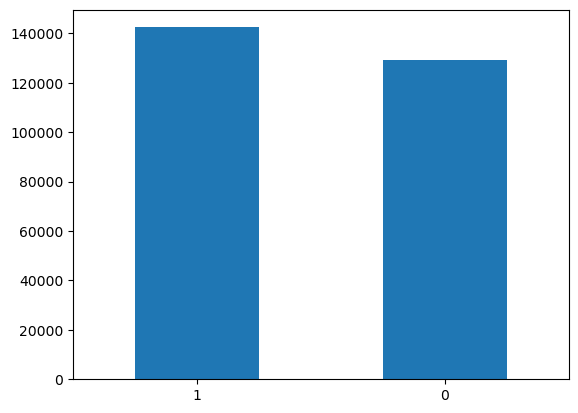

1    0.524314
0    0.475686
Name: Adj Closing Price Change, dtype: float64


In [20]:
# Plot the visualization 

df['Adj Closing Price Change'].value_counts().plot(kind='bar')
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.xticks(rotation=0)
plt.show()

print(df['Adj Closing Price Change'].value_counts(normalize=True))

### Sampling: 

In [65]:
df.shape

(271679, 8)

In [66]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Adj Closing Yday,Adj Closing Price Change
1,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,6.562591,1
2,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,6.573935,0
3,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,6.469369,0
4,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,6.457407,1
5,7.600000,7.607143,7.444643,7.503929,6.442997,462229600,6.500339,0


In [103]:
# Sample 15% of our data 

sample_df = df.sample(frac=0.15).copy()

In [104]:
# Sanity Check 

sample_df.shape

(40752, 8)

In [105]:
# value counts of our target column 

sample_df['Adj Closing Price Change'].value_counts()

1    21350
0    19402
Name: Adj Closing Price Change, dtype: int64

**Observations:** 
- Need to downsample

In [106]:
# Downsample class 1 to equal class 0 

class_0 = sample_df[sample_df['Adj Closing Price Change'] == 0]
class_1 = sample_df[sample_df['Adj Closing Price Change'] == 1]

In [107]:
class_0_count = len(class_0)
class_1_count = len(class_1)

print(f"Class 0: {class_0_count}")
print(f"Class 1: {class_1_count}")

Class 0: 19402
Class 1: 21350


In [108]:
from sklearn.utils import resample

# Determine the desired number of samples for each class
desired_count = class_0_count

# Downsample class 0
downsampled_class_0 = resample(class_0, n_samples=desired_count, random_state=42)

# Downsample class 1
downsampled_class_1 = resample(class_1, n_samples=desired_count, random_state=42)


# Combine the downsampled samples
balanced_dataset = pd.concat([downsampled_class_0, downsampled_class_1])

In [109]:
balanced_dataset['Adj Closing Price Change'].value_counts()

0    19402
1    19402
Name: Adj Closing Price Change, dtype: int64

In [110]:
balanced_dataset

,Open,High,Low,Close,Adj Close,Volume,Adj Closing Yday,Adj Closing Price Change
80494,11.910000,12.023333,11.573333,11.593333,10.402975,32054400,10.675164,0
76746,20.180000,20.200001,19.840000,19.879999,14.873996,46229800,15.113414,0
81626,24.686666,24.736668,24.533333,24.676666,24.063576,6776400,24.079828,0
8730,157.270004,158.130005,154.910004,155.369995,154.064896,2487900,156.960358,0
100111,37.470001,37.730000,37.230000,37.320000,36.336582,7128600,36.823406,0
...,...,...,...,...,...,...,...,...
96736,115.349998,116.410004,114.720001,116.180000,115.606560,3534200,114.710999,1
189485,48.290001,51.139999,48.132000,50.372002,46.973930,8054000,46.433064,1
30203,283.000000,284.200012,267.109985,272.760010,272.760010,13075400,260.350006,1
230999,40.820000,41.369999,40.759998,41.360001,41.360001,967400,40.790001,1


In [111]:
balanced_dataset.shape

(38804, 8)

In [112]:
# Drop the columns we do not need 

balanced_dataset = balanced_dataset.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)

In [113]:
# Sanity Check 

balanced_dataset.head()

,Adj Close,Adj Closing Yday,Adj Closing Price Change
80494,10.402975,10.675164,0
76746,14.873996,15.113414,0
81626,24.063576,24.079828,0
8730,154.064896,156.960358,0
100111,36.336582,36.823406,0


### TO CSV:

In [27]:
df.to_csv('clean_data.csv', index=False)

In [114]:
balanced_dataset.to_csv('sample_balanced_data.csv', index=False)